In [1]:
import pandas as pd
import numpy as np

In [2]:
#load and print the 403 solutions found during second optimization iteration (nfe = 10.000)
results = pd.read_csv('second_optimization_results.csv')
results

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,0,1,0,1,1,1,0,1,1,0,...,1.099694e+08,0.000915,8.617556e+07,0.000000,4.519126e+07,0.000000,2.590736e+07,0.000144,1.285900e+09,339.139044
1,1,1,1,0,1,0,0,0,1,0,...,6.531448e+07,0.026083,3.319692e+07,0.023932,2.240386e+07,0.000000,4.419351e+07,0.000000,5.389000e+08,0.000000
2,2,1,1,0,0,0,0,0,1,0,...,1.360345e+08,0.017214,8.278355e+07,0.000000,4.165369e+07,0.000000,9.823801e+07,0.025338,1.999000e+08,0.000000
3,3,0,1,0,0,1,1,0,1,0,...,7.791471e+07,0.013701,2.419803e+07,0.000000,3.958118e+07,0.000000,6.392200e+07,0.000000,8.070000e+08,0.000000
4,4,1,0,0,0,0,0,0,0,0,...,2.266910e+08,0.000000,7.763415e+07,0.012677,4.165369e+07,0.000000,1.245967e+08,0.044061,8.460000e+07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,401,0,1,0,1,0,0,0,0,1,...,1.994818e+07,0.023057,7.394612e+07,0.000000,8.453408e+06,0.000000,3.035153e+07,0.000000,1.465000e+09,0.000000
402,402,0,0,0,0,0,1,0,1,0,...,4.696104e+07,0.010338,5.619110e+07,0.023817,2.668432e+07,0.000389,2.392618e+06,0.002625,1.003100e+09,0.000000
403,403,1,1,0,0,0,0,0,0,0,...,5.671691e+07,0.065446,7.786943e+07,0.070750,1.194459e+07,0.002038,5.359368e+07,0.002933,1.692000e+08,0.000000
404,404,0,0,0,0,0,0,0,0,0,...,2.266910e+08,0.000000,6.465627e+07,0.025354,1.359451e+07,0.004900,1.123974e+08,0.065702,0.000000e+00,0.000000


# Key interests as defined by our actor
1. Minimization of flood risk in general, but focus on farmers
1. If RfR occurs, farmer should be compensated
1. We should have lower flood risk than dike ring 4
1. Livelihoods is more important than empircal evidence



In [3]:
#Make a list of all the column titles so we can filter the ones of interest
cols = [results.columns]
cols

[Index(['Unnamed: 0', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1',
        '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1',
        '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat',
        'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
        'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
        'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
        'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
        'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
        'A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs',
        'A.2_Expected Number of Deaths', 'A.3 Total Costs',
        'A.3_Expected Number of Deaths', 'A.4 Total Costs',
        'A.4_Expected Number of Deaths', 'A.5 Total Costs',
        'A.5_Expected Number of Deaths', 'RfR Total Costs',
        'Expected Evacuation Costs'],
       dtype='object')]

In [4]:
cols_of_interest = ['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', 
                    'A.1 Total Costs', 'A.1_Expected Number of Deaths', 
                    'A.2 Total Costs', 'A.2_Expected Number of Deaths',
                     'A.4_Expected Number of Deaths']

In [5]:
interests = results[cols_of_interest]
interests

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.4_Expected Number of Deaths
0,1,0,1,1,1,0,7.643154e+07,0.0,1.099694e+08,0.000915,0.000000
1,1,1,0,1,0,0,1.295039e+08,0.0,6.531448e+07,0.026083,0.000000
2,1,1,0,0,0,0,3.269490e+07,0.0,1.360345e+08,0.017214,0.000000
3,0,1,0,0,1,1,1.982901e+08,0.0,7.791471e+07,0.013701,0.000000
4,1,0,0,0,0,0,3.269490e+07,0.0,2.266910e+08,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
401,0,1,0,1,0,0,3.269490e+07,0.0,1.994818e+07,0.023057,0.000000
402,0,0,0,0,0,1,1.481096e+08,0.0,4.696104e+07,0.010338,0.000389
403,1,1,0,0,0,0,1.390875e+08,0.0,5.671691e+07,0.065446,0.002038
404,0,0,0,0,0,0,9.497930e+07,0.0,2.266910e+08,0.000000,0.004900


Based on our columns of interest we filter out solutions that best cater to our four main points proposed above in the following steps:
1. First we we'll filter out the 80% worst performing scenario's based on the deaths in our dike rings.
1. Then we filter out all the options where the `Expected Number of Deaths` is higher than the number of deaths of Dike ring 4. 
1. After this we'll look in which cases RfR occurs by creating a new column for our dike rings
1. Finally, if RfR occurs for a dike ring, we whish to keep our costs as low as possible for destroyed revenues.

In [6]:
#Filters the best performing 20% of scenarios in our actors interest
candidates = interests.nsmallest(81, ['A.2_Expected Number of Deaths', 'A.1_Expected Number of Deaths'])
candidates

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.4_Expected Number of Deaths
4,1,0,0,0,0,0,3.269490e+07,0.000000,2.266910e+08,0.000000,0.000000
6,1,0,0,0,0,0,1.117382e+08,0.000000,2.854709e+08,0.000000,0.001214
7,0,0,0,0,0,0,1.268290e+08,0.000000,2.854709e+08,0.000000,0.001214
23,0,1,0,1,0,0,8.524602e+07,0.000000,4.784270e+07,0.000000,0.001421
29,0,0,1,0,0,0,2.365539e+08,0.000000,2.272878e+08,0.000000,0.000839
...,...,...,...,...,...,...,...,...,...,...,...
119,1,0,0,0,0,0,1.019881e+08,0.000000,2.065722e+08,0.000432,0.000560
313,0,0,0,0,0,0,1.816097e+08,0.155325,1.771337e+08,0.000544,0.001109
114,0,0,0,0,0,0,1.145091e+08,0.006213,1.066989e+08,0.000592,0.000000
180,0,0,0,0,0,0,1.633646e+08,0.012426,1.528413e+08,0.000592,0.000067


In [7]:
candidates['better'] = np.where((candidates['A.1_Expected Number of Deaths'] <= candidates['A.4_Expected Number of Deaths']) &
                               (candidates['A.2_Expected Number of Deaths'] <= candidates['A.4_Expected Number of Deaths']),
                               candidates['A.1_Expected Number of Deaths'], 
                               np.nan)
candidates = candidates.dropna()

In [8]:
candidates.head()

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.4_Expected Number of Deaths,better
4,1,0,0,0,0,0,3.269490e+07,0.0,2.266910e+08,0.0,0.000000,0.0
6,1,0,0,0,0,0,1.117382e+08,0.0,2.854709e+08,0.0,0.001214,0.0
7,0,0,0,0,0,0,1.268290e+08,0.0,2.854709e+08,0.0,0.001214,0.0
23,0,1,0,1,0,0,8.524602e+07,0.0,4.784270e+07,0.0,0.001421,0.0
29,0,0,1,0,0,0,2.365539e+08,0.0,2.272878e+08,0.0,0.000839,0.0


In [9]:
candidates['RfR ring 1'] = np.where((candidates['0_RfR 0'] + candidates['0_RfR 1'] + candidates['0_RfR 1']) > 0,
                                    True, False)

candidates['RfR ring 2'] = np.where((candidates['1_RfR 0'] + candidates['1_RfR 1'] + candidates['1_RfR 1']) > 0,
                                    True, False)

<ipython-input-9-707abbf16f6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates['RfR ring 1'] = np.where((candidates['0_RfR 0'] + candidates['0_RfR 1'] + candidates['0_RfR 1']) > 0,
<ipython-input-9-707abbf16f6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates['RfR ring 2'] = np.where((candidates['1_RfR 0'] + candidates['1_RfR 1'] + candidates['1_RfR 1']) > 0,


In [10]:
candidates.mean()

0_RfR 0                          2.222222e-01
0_RfR 1                          2.444444e-01
0_RfR 2                          8.888889e-02
1_RfR 0                          1.333333e-01
1_RfR 1                          2.222222e-02
1_RfR 2                          1.777778e-01
A.1 Total Costs                  9.011969e+07
A.1_Expected Number of Deaths    0.000000e+00
A.2 Total Costs                  1.824218e+08
A.2_Expected Number of Deaths    2.286458e-05
A.4_Expected Number of Deaths    2.048453e-03
better                           0.000000e+00
RfR ring 1                       4.222222e-01
RfR ring 2                       1.555556e-01
dtype: float64

In [11]:
candidates['possible_sol_ring1'] = (candidates['RfR ring 1'] == True) & (candidates['A.1 Total Costs'] < 1e8)
candidates['possible_sol_ring2'] = (candidates['RfR ring 2'] == True) & (candidates['A.2 Total Costs'] < 1.8e8)

<ipython-input-11-64af4c3d77d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates['possible_sol_ring1'] = (candidates['RfR ring 1'] == True) & (candidates['A.1 Total Costs'] < 1e8)
<ipython-input-11-64af4c3d77d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates['possible_sol_ring2'] = (candidates['RfR ring 2'] == True) & (candidates['A.2 Total Costs'] < 1.8e8)


In [12]:
candidates.head()

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.4_Expected Number of Deaths,better,RfR ring 1,RfR ring 2,possible_sol_ring1,possible_sol_ring2
4,1,0,0,0,0,0,3.269490e+07,0.0,2.266910e+08,0.0,0.000000,0.0,True,False,True,False
6,1,0,0,0,0,0,1.117382e+08,0.0,2.854709e+08,0.0,0.001214,0.0,True,False,False,False
7,0,0,0,0,0,0,1.268290e+08,0.0,2.854709e+08,0.0,0.001214,0.0,False,False,False,False
23,0,1,0,1,0,0,8.524602e+07,0.0,4.784270e+07,0.0,0.001421,0.0,True,True,True,True
29,0,0,1,0,0,0,2.365539e+08,0.0,2.272878e+08,0.0,0.000839,0.0,False,False,False,False


# Choice made based on policy decisions of other actors
We now have two options to consider:
1. RfR will happen
1. RfR will not happen

It is likely that RfR will happen. This means that we have to take into account our maximum boundaries for the costs, which are based on the means. To do so, we will look at solutions that are meeting these constraints for both dike rings (i.e. where both `possible_sol_ring1` and `possible_sol_ring2` have a value `True`

In [13]:
RfR_sol = candidates.drop(candidates[(candidates.possible_sol_ring1 == False) | (candidates.possible_sol_ring2 == False)].index)

In [14]:
RfR_sol

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.4_Expected Number of Deaths,better,RfR ring 1,RfR ring 2,possible_sol_ring1,possible_sol_ring2
23,0,1,0,1,0,0,8.524602e+07,0.0,4.784270e+07,0.0,0.001421,0.0,True,True,True,True
77,1,1,0,1,0,0,3.725520e+07,0.0,5.335857e+07,0.0,0.000138,0.0,True,True,True,True
343,0,1,1,1,0,1,0.000000e+00,0.0,7.331545e+07,0.0,0.001559,0.0,True,True,True,True


### Back to Policy
In order to turn these three options back to a policy, one must look back at the original model and see what the inputs were for that model. Once these inputs have been identified, they can be extracted from the dataframe above and inserted back into the model as a policy. These inputs can be found as levers inside the model. However, since the dataframe above is a cut down version both in length and width from the original dataframe, the index numbers will be taken and the original dataframe will be loaded and cut down to only the specified index numbers.

In [15]:
df_policies = results.copy()

policies_index = RfR_sol.index.tolist()

In [16]:
policies_index

[23, 77, 343]

In [17]:
df_policies = df_policies.loc[policies_index, :]

In [18]:
try:
    df_policies = df_policies.drop(columns=["Unnamed: 0"])
except Exception as e:
    print(f"Exception occurred while trying to drop column --> {e}\n"
          f"Column does not exist.")

Since only the first 31 columns hold information regarding the levers, only those columns will be kept and the rest can be removed from the dataframe.

In [19]:
df_policies = df_policies.iloc[:, :31].reset_index(drop=True)
df_policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
0,0,1,0,1,0,0,0,1,0,1,...,0,3,1,5,0,2,5,0,1,0
1,1,1,0,1,0,0,0,0,1,1,...,0,0,2,4,1,0,1,0,0,4
2,0,1,1,1,0,1,0,1,0,0,...,0,0,0,6,1,0,0,0,0,0


As one can see from the dataframe above, "A.5_DikeIncrease" is the last column in the dataframe, which corresponds to the last lever used in the model as well. Now, three different policies will be created using the ema_workbench function called `Policy`

In [20]:
from ema_workbench import Policy, MultiprocessingEvaluator, SequentialEvaluator, ema_logging
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt

In [21]:
dict_policies = df_policies.to_dict('index')

In [22]:
policies = []
for dict_index in range(len(dict_policies)):
    policy_dict = dict_policies[dict_index]
    policies.append(Policy(f"pol_{dict_index}", **policy_dict))

In [23]:
model, array = get_model_for_problem_formulation(3)
n_scenarios = 12

with SequentialEvaluator(model) as evaluator:
    results_w_pol, outcomes_w_policy = evaluator.perform_experiments(scenarios=n_scenarios, policies=policies)

In [24]:
df_outcomes_w_policy = pd.DataFrame(outcomes_w_policy)
df_full = pd.concat([df_outcomes_w_policy, results_w_pol], axis=1)

In [25]:
signal_noise_r = []
for policy_analyzed in range(len(policies)):
    df = (df_outcomes_w_policy.tail((len(policies) - policy_analyzed)*n_scenarios)).head(n_scenarios)
    df.loc["mean"] = df.mean()
    df.loc["stdev"] = df.std()
    df.loc["ratio"] = df.loc["mean"] / df.loc["stdev"]
    partial_dict = df.loc["ratio"].to_dict()
    signal_noise_r.append(partial_dict)

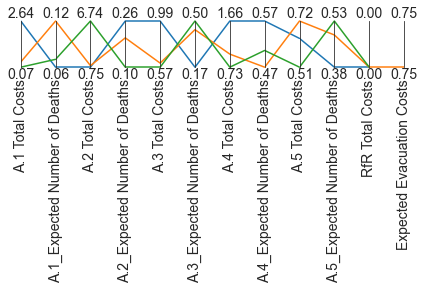

In [26]:
df_plot_signals = pd.DataFrame(signal_noise_r)

limits = parcoords.get_limits(df_plot_signals)

df_plot_signals.replace([np.inf, -np.inf], 0, inplace=True)
limits.replace([np.inf, -np.inf], 0, inplace=True)

axes = parcoords.ParallelAxes(limits)
axes.plot(df_plot_signals)
plt.show()

In [27]:
def calculate_regret() :
    df_regret = pd.DataFrame(columns=["policy_num", "Expected Annual Damage", "Total Investment Costs",
                                      "Expected Number of Deaths"])
    for unique_item in df_full["policy"].unique() :
        df_partial = df_full.loc[df_full["policy"] == unique_item]
        df_partial.reset_index(drop=True, inplace=True)
        max_damage = max(df_partial["Expected Annual Damage"])
        max_cost = max(df_partial["Total Investment Costs"])
        max_death = max(df_partial["Expected Number of Deaths"])
        for index in range(len(df_partial)) :
            new_row = {'policy_num' : unique_item,
                       'Expected Annual Damage' : max_damage - df_partial.loc[index, 'Expected Annual Damage'],
                       'Total Investment Costs' : max_cost - df_partial.loc[index, 'Total Investment Costs'],
                       'Expected Number of Deaths' : max_death - df_partial.loc[index, 'Expected Number of Deaths']}
            df_regret = df_regret.append(new_row, ignore_index=True)

    columns_to_sum = ['Expected Annual Damage', "Total Investment Costs", 'Expected Number of Deaths']
    df_regret['total_regret'] = df_regret[columns_to_sum].sum(axis=1)

    return df_regret

In [28]:
df_regret = calculate_regret()

df_regret_plot = pd.DataFrame(columns=['policy', 'max_regret', 'min_regret'])
for unique_item in df_regret['policy_num'].unique() :
    df_partial = df_regret.loc[df_regret['policy_num'] == unique_item]
    new_row = {'policy' : unique_item,
               'max_regret' : max(df_partial['total_regret']),
               'min_regret' : min(df_partial['total_regret'])}
    df_regret_plot = df_regret_plot.append(new_row, ignore_index=True)

df_regret_plot.sort_values(['max_regret'], inplace=True)
best_policy = df_regret_plot.loc[0, 'policy']

KeyError: 'Expected Annual Damage'

In [ ]:
print(f"The best policy in terms of robustness is policy number: {best_policy}")